In [61]:
file_3 = "gz_2010_us_050_00_500k.json"
file_3_df = pd.read_json(file_3)
file_3_df

ValueError: Expected object or value

In [1]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [ ]:
#interactive mode
# %matplotlib notebook

In [2]:
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')
county21 = recent_census21.str.split(',').str[0]

county21

/Users/jesse/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0               Georgia
1        Appling County
2       Atkinson County
3          Bacon County
4          Baker County
             ...       
155    Whitfield County
156       Wilcox County
157       Wilkes County
158    Wilkinson County
159        Worth County
Name: Unnamed: 0, Length: 160, dtype: object

In [3]:
# 2021 data
data21 = recent_census[['2020','2021']]

census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

census_20

0      10725800
1         18428
2          8301
3         11123
4          2844
         ...   
155      102727
156        8731
157        9556
158        8844
159       20719
Name: 2020, Length: 160, dtype: int64

In [4]:
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [5]:
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

census21_df= organized_21.set_index("County")

census21_df

,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [6]:
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# file_2_df
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
file_2_ga

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
398,40,3,5,13,0,Georgia,Georgia,9687653,9688737,9712209,...,3.041427,3.798407,1.747055,4.060100,5.814395,7.200931,5.948622,5.638213,6.502924,4.765012
399,50,3,5,13,1,Georgia,Appling County,18236,18237,18337,...,3.098163,-9.988871,-4.843669,2.931914,-4.662637,-0.813824,-1.626457,4.109774,-8.340780,-2.941657
400,50,3,5,13,3,Georgia,Atkinson County,8375,8380,8363,...,-9.329028,-18.178535,-4.116970,-14.082797,7.737879,-11.188643,-7.009063,6.505632,-16.613495,8.402353
401,50,3,5,13,5,Georgia,Bacon County,11096,11097,11062,...,7.833603,-5.021971,0.089582,0.715820,1.071285,2.400747,-9.077964,-10.313901,-2.342976,-7.590133
402,50,3,5,13,7,Georgia,Baker County,3451,3447,3431,...,-38.267576,11.974255,-8.933889,-18.694407,-27.782065,-1.881763,-3.468390,-25.932448,-16.297262,-24.592888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,50,3,5,13,313,Georgia,Whitfield County,102599,102602,102740,...,-5.533701,-5.965944,-7.713370,-1.963739,-0.193555,1.134970,-7.072937,-4.851221,-1.439719,-7.111897
554,50,3,5,13,315,Georgia,Wilcox County,9255,9251,9313,...,-6.572922,-18.889556,1.324284,-14.569315,12.371823,-17.704073,-7.380493,4.213163,-21.390374,-8.299725
555,50,3,5,13,317,Georgia,Wilkes County,10593,10593,10389,...,-13.676706,-12.202923,-10.187775,4.424111,0.301705,-7.600709,9.859728,3.449500,-4.588559,-0.822073
556,50,3,5,13,319,Georgia,Wilkinson County,9563,9569,9528,...,-14.360382,7.303906,-11.569897,-8.581849,-19.495725,-3.425225,-5.674864,10.246130,-7.914832,-9.240478


In [7]:
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})
ga_census_20 = ga_census_estimate_population.set_index("County")
ga_census_20

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047
...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769


In [8]:
# merge_census = ga_census_20.merge(census21_df,how ='left', on ='CTYNAME')

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')


column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

merge_census = merge_census_raw.reindex(columns=column_names)

merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [9]:
year_merge = merge_census.keys()
year_merge

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [10]:
countyDataDictionary_merge = {}
county_names= []

for x in randomNumbers_merge:

    countyDataDictionary_merge[x] = merge_census.iloc[x]        

for x in countyDataDictionary_merge:
    print(countyDataDictionary_merge[x])
    
    county_names.append(countyDataDictionary_merge[x].name)
    plt.plot(year_merge, countyDataDictionary_merge[x])
    
# for col in df:
#     plt.plot(df.index, df[col])
# plt.legend(df.columns)
# plt.show()

county_df = pd.DataFrame({"data":countyDataDictionary_merge})

# print(county_df)

plt.legend(county_names,loc="lower left")
# plt.yscale('log')
plt.show()

NameError: name 'randomNumbers_merge' is not defined

In [11]:
merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [41]:
# grabbing all the urban counties

urban_counties = merge_census.loc[merge_census['2020'] > 50000, :] 
urban_counties = urban_counties.drop(["Georgia"])
urban_counties

#### Old Code to set county type conditionally
# merge_census['Type'] = 'Rural'
# merge_census.loc[merge_census['2020'] > 50000, 'Type'] = 'Urban'
# merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Barrow County,69670,69835,70128,71233,72843,74979,77108,79086,81105,83581,83963,86658
Bartow County,100041,100110,100241,100923,101251,102063,103418,105190,106488,107757,109311,110843
Bibb County,155878,156297,156701,155138,154447,154068,153212,152920,153069,153191,157104,156762
Bulloch County,70560,72642,73114,71830,72667,73137,74660,76046,77332,79718,81378,82442
Camden County,50680,50344,51402,51478,52000,52549,52602,53211,53816,54784,54911,55664
Carroll County,110655,110733,111428,112290,113970,114501,116180,117437,118094,120115,119463,121968
Catoosa County,64073,64771,64893,65258,65516,65841,66350,66570,67402,67585,67976,68397
Chatham County,265799,271665,276243,277790,282396,286239,289055,289771,289771,290185,294904,296329
Cherokee County,215226,217769,220690,224372,230239,235424,241929,247944,254277,259475,268043,274615


In [45]:
# grabbing rural counties

rural_counties = merge_census.loc[merge_census['2020'] < 50000, :] 
rural_counties

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
Baldwin County,45703,45178,46522,46191,45920,45566,45260,44993,45001,45006,43773,43781
...,...,...,...,...,...,...,...,...,...,...,...,...
White County,27201,27401,27626,27831,28025,28389,28793,29429,29893,30601,28090,28442
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [46]:
# rural_counties
rural_normalized = rural_counties.pct_change(axis='columns', periods=1)
rural_normalized = rural_normalized.drop(columns=['2010'])
rural_normalized

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Appling County,0.006653,-0.004171,-0.000816,0.005553,-0.002653,0.001249,0.000217,0.004933,-0.008038,0.002121,0.003256
Atkinson County,-0.000478,-0.012561,0.001090,-0.006293,0.014615,-0.004561,-0.004341,0.010537,-0.008988,0.003870,0.010842
Bacon County,0.007955,0.000179,0.001973,0.000358,0.004205,0.003831,-0.005680,-0.009639,0.000180,0.002253,-0.003956
Baker County,-0.034975,0.017819,-0.007122,-0.017633,-0.028902,-0.002193,-0.008477,-0.021849,-0.013597,-0.066623,-0.008790
Baldwin County,-0.011487,0.029749,-0.007115,-0.005867,-0.007709,-0.006716,-0.005899,0.000178,0.000111,-0.027396,0.000183
...,...,...,...,...,...,...,...,...,...,...,...
White County,0.007353,0.008211,0.007421,0.006971,0.012988,0.014231,0.022089,0.015767,0.023684,-0.082056,0.012531
Wilcox County,-0.006979,-0.019356,-0.001654,-0.013806,0.009632,-0.020078,-0.006113,0.000456,-0.020150,0.014407,0.000916
Wilkes County,-0.015305,-0.013392,-0.016051,0.002920,-0.003313,-0.011988,0.006117,-0.002331,-0.007720,-0.021804,-0.004500


In [47]:
urban_normalized = urban_counties.pct_change(axis='columns', periods=1)
urban_normalized = urban_normalized.drop(columns=['2010'])
urban_normalized

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Barrow County,0.002368,0.004196,0.015757,0.022602,0.029323,0.028395,0.025652,0.025529,0.030528,0.004570,0.032097
Bartow County,0.000690,0.001309,0.006804,0.003250,0.008020,0.013276,0.017134,0.012340,0.011917,0.014421,0.014015
Bibb County,0.002688,0.002585,-0.009974,-0.004454,-0.002454,-0.005556,-0.001906,0.000974,0.000797,0.025543,-0.002177
Bulloch County,0.029507,0.006498,-0.017562,0.011653,0.006468,0.020824,0.018564,0.016911,0.030854,0.020823,0.013075
Camden County,-0.006630,0.021015,0.001479,0.010140,0.010558,0.001009,0.011578,0.011370,0.017987,0.002318,0.013713
Carroll County,0.000705,0.006276,0.007736,0.014961,0.004659,0.014664,0.010819,0.005594,0.017113,-0.005428,0.020969
Catoosa County,0.010894,0.001884,0.005625,0.003954,0.004961,0.007731,0.003316,0.012498,0.002715,0.005785,0.006193
Chatham County,0.022069,0.016852,0.005600,0.016581,0.013609,0.009838,0.002477,0.000000,0.001429,0.016262,0.004832
Cherokee County,0.011815,0.013413,0.016684,0.026149,0.022520,0.027631,0.024863,0.025542,0.020442,0.033021,0.024518


In [50]:
urban_normalized.mean()

2011    0.009623
2012    0.008546
2013    0.007009
2014    0.010611
2015    0.011152
2016    0.012941
2017    0.012107
2018    0.011670
2019    0.012936
2020    0.011010
2021    0.011023
dtype: float64

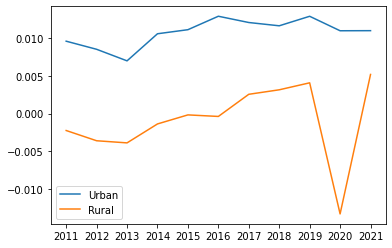

In [60]:
plt.plot(urban_normalized.mean(),label='Urban')
plt.plot(rural_normalized.mean(),label='Rural')
plt.legend()
plt.show()

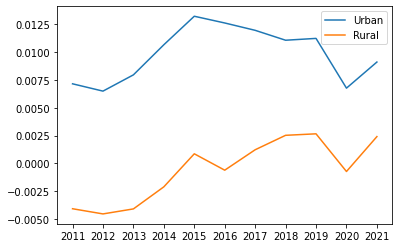

In [68]:
plt.plot(urban_normalized.median(),label='Urban')
plt.plot(rural_normalized.median(),label='Rural')
plt.legend()
plt.show()

In [14]:
merge_normalized = merge_census.pct_change(axis='columns', periods=1)
merge_normalized

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,NaN,0.009413,0.010195,0.007271,0.009585,0.011136,0.012284,0.010534,0.009826,0.010327,0.009200,0.006877
Appling County,NaN,0.006653,-0.004171,-0.000816,0.005553,-0.002653,0.001249,0.000217,0.004933,-0.008038,0.002121,0.003256
Atkinson County,NaN,-0.000478,-0.012561,0.001090,-0.006293,0.014615,-0.004561,-0.004341,0.010537,-0.008988,0.003870,0.010842
Bacon County,NaN,0.007955,0.000179,0.001973,0.000358,0.004205,0.003831,-0.005680,-0.009639,0.000180,0.002253,-0.003956
Baker County,NaN,-0.034975,0.017819,-0.007122,-0.017633,-0.028902,-0.002193,-0.008477,-0.021849,-0.013597,-0.066623,-0.008790
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,NaN,0.001645,0.000165,-0.002283,0.003389,0.005648,0.006688,-0.002186,0.000221,0.001498,-0.014751,0.001178
Wilcox County,NaN,-0.006979,-0.019356,-0.001654,-0.013806,0.009632,-0.020078,-0.006113,0.000456,-0.020150,0.014407,0.000916
Wilkes County,NaN,-0.015305,-0.013392,-0.016051,0.002920,-0.003313,-0.011988,0.006117,-0.002331,-0.007720,-0.021804,-0.004500


In [15]:
# Get rid of NaN columns
merge_normalized = merge_normalized.drop(columns=['2010'])
# Get rid of Georgia row so it doesn't affect county statistics
merge_normalized = merge_normalized.drop(["Georgia"])

In [25]:
merge_normalized

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Appling County,0.006653,-0.004171,-0.000816,0.005553,-0.002653,0.001249,0.000217,0.004933,-0.008038,0.002121,0.003256
Atkinson County,-0.000478,-0.012561,0.001090,-0.006293,0.014615,-0.004561,-0.004341,0.010537,-0.008988,0.003870,0.010842
Bacon County,0.007955,0.000179,0.001973,0.000358,0.004205,0.003831,-0.005680,-0.009639,0.000180,0.002253,-0.003956
Baker County,-0.034975,0.017819,-0.007122,-0.017633,-0.028902,-0.002193,-0.008477,-0.021849,-0.013597,-0.066623,-0.008790
Baldwin County,-0.011487,0.029749,-0.007115,-0.005867,-0.007709,-0.006716,-0.005899,0.000178,0.000111,-0.027396,0.000183
...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,0.001645,0.000165,-0.002283,0.003389,0.005648,0.006688,-0.002186,0.000221,0.001498,-0.014751,0.001178
Wilcox County,-0.006979,-0.019356,-0.001654,-0.013806,0.009632,-0.020078,-0.006113,0.000456,-0.020150,0.014407,0.000916
Wilkes County,-0.015305,-0.013392,-0.016051,0.002920,-0.003313,-0.011988,0.006117,-0.002331,-0.007720,-0.021804,-0.004500


In [26]:
merge_normalized.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.000807,-0.000481,-0.001088,0.001711,0.002743,0.003051,0.005022,0.005354,0.006368,-0.007067,0.006701
std,0.013153,0.018593,0.014074,0.013849,0.013448,0.015497,0.013095,0.012929,0.013484,0.056930,0.014345
min,-0.038405,-0.055363,-0.090239,-0.043436,-0.056483,-0.091196,-0.024615,-0.034276,-0.037888,-0.231706,-0.045771
25%,-0.006641,-0.009506,-0.007648,-0.006557,-0.004502,-0.005383,-0.004382,-0.001483,-0.001207,-0.023594,-0.001695
50%,-0.000478,-0.001341,-0.001764,0.001069,0.002713,0.002334,0.004062,0.004317,0.005003,0.003380,0.004999
75%,0.006541,0.006387,0.007793,0.009807,0.009787,0.012902,0.012842,0.012737,0.013317,0.020902,0.014320
max,0.046848,0.121861,0.037608,0.058866,0.042778,0.044889,0.044237,0.039391,0.041998,0.133705,0.053610


In [27]:
# Top 10 Counties
merge_normalized['2021'].nlargest(n=10)

County
Dawson County     0.053610
Long County       0.053110
Jackson County    0.046590
Jasper County     0.043722
Bryan County      0.043090
Barrow County     0.032097
Union County      0.030485
Forsyth County    0.029353
Pike County       0.028624
Lamar County      0.028571
Name: 2021, dtype: float64

In [29]:
#Bottom 10 Counties
merge_normalized.nsmallest(n=10, columns=['2021'])


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Chattahoochee County,0.007599,0.090772,-0.001790,-0.043436,-0.056483,-0.091196,0.013115,0.034422,0.041998,-0.137294,-0.045771
Dooly County,-0.016162,-0.013415,-0.002844,-0.008697,-0.015090,-0.011615,-0.012689,0.001753,-0.023181,-0.168507,-0.023066
Terrell County,-0.014173,-0.017572,-0.006287,-0.009381,-0.007158,-0.015861,-0.019723,-0.011152,-0.003255,0.067654,-0.020649
Early County,-0.017482,-0.013900,-0.009210,-0.008726,0.000765,-0.014246,0.000291,-0.005624,-0.007704,0.062598,-0.017941
Twiggs County,-0.016364,-0.031236,-0.004439,-0.014433,-0.005477,-0.010775,0.000605,-0.010764,-0.001834,-0.021803,-0.016278
Randolph County,-0.012780,-0.034346,-0.014774,0.015690,-0.022146,-0.000419,-0.024615,-0.021222,-0.002930,-0.063033,-0.014113
Schley County,0.004582,-0.003966,0.014334,0.018449,0.003662,-0.005568,0.011006,-0.004584,0.008058,-0.136277,-0.013222
Treutlen County,-0.010012,-0.005276,-0.014881,0.018995,-0.000881,-0.012781,0.004613,0.004296,0.011799,-0.068513,-0.013146
Burke County,0.007283,-0.019521,-0.009630,-0.008891,0.000663,-0.000265,-0.003755,-0.002306,-0.000178,0.094413,-0.012631


In [64]:
# This gives us a good visual
merge_normalized = merge_normalized.sort_values(by=['2021'])

In [67]:
merge_pretty = merge_normalized.style.format({
    '2011': '{:,.2%}'.format,'2012': '{:,.2%}'.format,'2013': '{:,.2%}'.format,
    '2014': '{:,.2%}'.format,'2015': '{:,.2%}'.format,'2016': '{:,.2%}'.format,
    '2017': '{:,.2%}'.format,'2018': '{:,.2%}'.format,'2019': '{:,.2%}'.format,
    '2020': '{:,.2%}'.format,'2021': '{:,.2%}'.format,'2019': '{:,.2%}'.format,
    })
merge_pretty

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Chattahoochee County,0.76%,9.08%,-0.18%,-4.34%,-5.65%,-9.12%,1.31%,3.44%,4.20%,-13.73%,-4.58%
Dooly County,-1.62%,-1.34%,-0.28%,-0.87%,-1.51%,-1.16%,-1.27%,0.18%,-2.32%,-16.85%,-2.31%
Terrell County,-1.42%,-1.76%,-0.63%,-0.94%,-0.72%,-1.59%,-1.97%,-1.12%,-0.33%,6.77%,-2.06%
Early County,-1.75%,-1.39%,-0.92%,-0.87%,0.08%,-1.42%,0.03%,-0.56%,-0.77%,6.26%,-1.79%
Twiggs County,-1.64%,-3.12%,-0.44%,-1.44%,-0.55%,-1.08%,0.06%,-1.08%,-0.18%,-2.18%,-1.63%
Randolph County,-1.28%,-3.43%,-1.48%,1.57%,-2.21%,-0.04%,-2.46%,-2.12%,-0.29%,-6.30%,-1.41%
Schley County,0.46%,-0.40%,1.43%,1.84%,0.37%,-0.56%,1.10%,-0.46%,0.81%,-13.63%,-1.32%
Treutlen County,-1.00%,-0.53%,-1.49%,1.90%,-0.09%,-1.28%,0.46%,0.43%,1.18%,-6.85%,-1.31%
Burke County,0.73%,-1.95%,-0.96%,-0.89%,0.07%,-0.03%,-0.38%,-0.23%,-0.02%,9.44%,-1.26%


In [17]:
samples_df = merge_normalized.sample(10)
samples_df

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Calhoun County,-0.010751,-0.008604,0.004568,-0.012883,0.003531,-0.027081,0.005347,-0.008290,-0.024606,-0.100906,-0.009173
Candler County,0.016889,-0.009733,-0.012624,-0.008858,0.001014,-0.002485,-0.012826,0.010750,0.002035,0.015321,0.003272
Wilkinson County,-0.012070,0.007224,-0.012657,-0.008332,-0.021868,-0.006498,-0.007538,0.005808,-0.007662,-0.010295,-0.001470
Meriwether County,-0.010130,-0.012271,-0.005485,-0.000613,-0.001604,-0.005433,-0.001948,0.002380,0.002422,-0.023352,0.008439
Worth County,-0.008114,-0.007436,-0.013954,-0.002279,-0.015136,0.001933,-0.009647,-0.010959,-0.006008,0.026455,-0.007964
Pulaski County,-0.011177,-0.011725,-0.011779,-0.005010,-0.009635,-0.009904,-0.008764,-0.010539,0.007401,-0.116298,0.005475
Grady County,0.003037,0.007170,-0.006447,0.004618,-0.005151,-0.008404,-0.005342,-0.001292,-0.005742,0.066415,-0.011556
Towns County,0.004368,-0.001607,0.021212,0.027541,0.011461,0.018558,0.012351,0.024833,0.013931,0.044134,0.026796
Ben Hill County,-0.003060,0.000739,-0.008348,0.000057,-0.005383,-0.005815,-0.012046,-0.015534,-0.004942,0.026450,0.000291


In [36]:
merge_normalized

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Appling County,0.006653,-0.004171,-0.000816,0.005553,-0.002653,0.001249,0.000217,0.004933,-0.008038,0.002121,0.003256
Atkinson County,-0.000478,-0.012561,0.001090,-0.006293,0.014615,-0.004561,-0.004341,0.010537,-0.008988,0.003870,0.010842
Bacon County,0.007955,0.000179,0.001973,0.000358,0.004205,0.003831,-0.005680,-0.009639,0.000180,0.002253,-0.003956
Baker County,-0.034975,0.017819,-0.007122,-0.017633,-0.028902,-0.002193,-0.008477,-0.021849,-0.013597,-0.066623,-0.008790
Baldwin County,-0.011487,0.029749,-0.007115,-0.005867,-0.007709,-0.006716,-0.005899,0.000178,0.000111,-0.027396,0.000183
...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,0.001645,0.000165,-0.002283,0.003389,0.005648,0.006688,-0.002186,0.000221,0.001498,-0.014751,0.001178
Wilcox County,-0.006979,-0.019356,-0.001654,-0.013806,0.009632,-0.020078,-0.006113,0.000456,-0.020150,0.014407,0.000916
Wilkes County,-0.015305,-0.013392,-0.016051,0.002920,-0.003313,-0.011988,0.006117,-0.002331,-0.007720,-0.021804,-0.004500


In [34]:
# merge_census['Type'] = 'Rural'
# merge_census.loc[merge_census['2020'] > 50000, 'Type'] = 'Urban'
merge_urban = merge_normalized.loc[merge_normalized['2020'] > 50000, :]
merge_rural = merge_normalized.loc[merge_normalized['2020'] < 50000, :]
# merge_census

In [35]:
merge_urban

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,


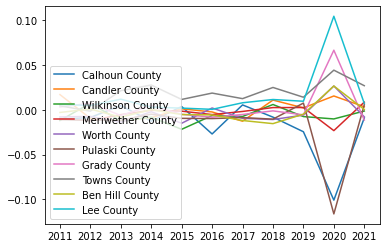

In [20]:
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.show()

In [ ]:
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.yscale('log')
plt.show()